DataSets

In [1]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing (1).csv


# EDA

In [2]:
#  load the data 
import pandas as pd
dfHouse=pd.read_csv('housing-1.csv')


In [3]:
dfHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
!pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: xlabel='median_house_value', ylabel='Count'>

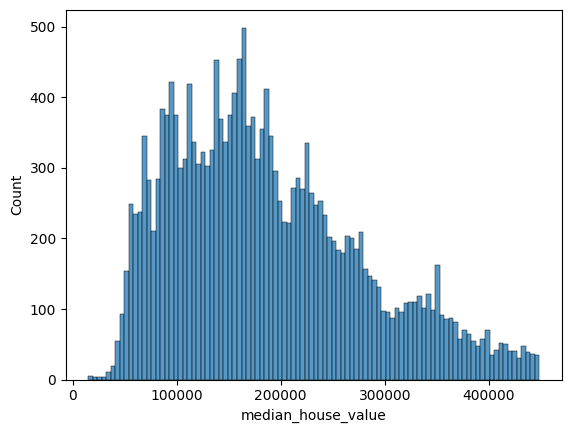

In [19]:
#  Is median_house_value has long tail?
import matplotlib as plt
import seaborn as sns
sns.histplot(dfHouse.median_house_value[dfHouse.median_house_value<450000],bins=100)


# dfHouse.median_house_value.hist(bins=100)

In [20]:
import numpy as np
price_log=np.log1p(dfHouse.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

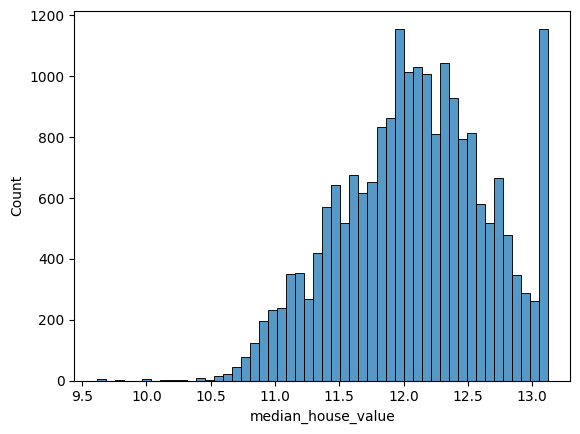

In [21]:
sns.histplot(price_log,bins=50)

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

Explore data

In [22]:
dfHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:

# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND':
dfHouseclean = dfHouse[dfHouse['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
# dfHouseclean=dfHouse[dfHouse['ocean_proximity']=='<1H OCEAN' or dfHouse['ocean_proximity']=='INLAND']

# dfHouseclean=dfHouse[dfHouse['ocean_proximity']=='<1H OCEAN' or dfHouse['ocean_proximity']=='INLAND']

In [28]:
dfHouseclean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


Question 1
There's one feature with missing values. What is it?

total_rooms
total_bedrooms
population
households

In [31]:
dfHouseclen=dfHouseclean.iloc[:,0:-1]

In [32]:
dfHouseclean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'population'?

995
1095
1195
1295


In [34]:
medianpopulation=dfHouseclean['population'].median()
medianpopulation


1195.0